In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
data['Revenue'] = data['UnitPrice'] * data['Quantity']
tx_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


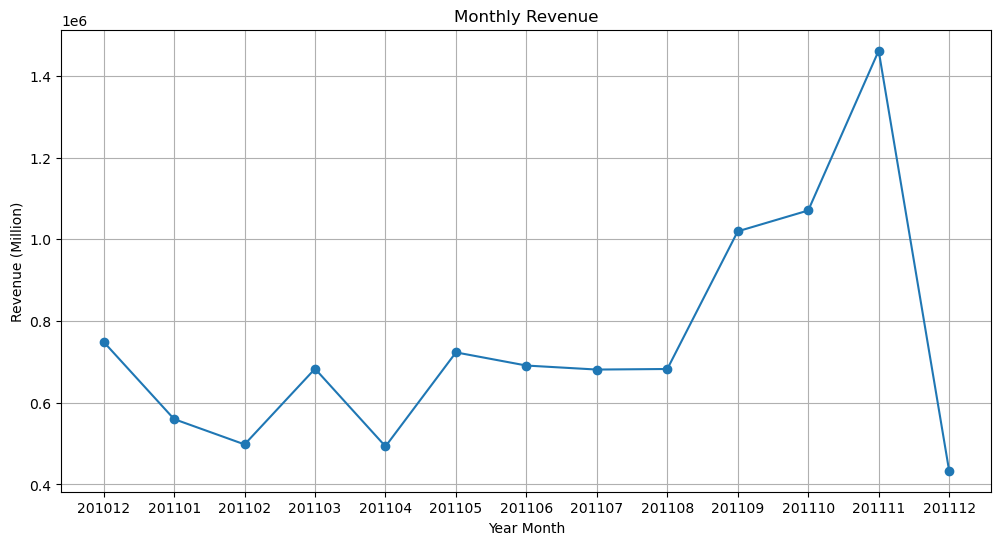

In [9]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Year Month')
plt.ylabel('Revenue (Million)')
plt.grid()
plt.show()


In [7]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'] .pct_change()
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


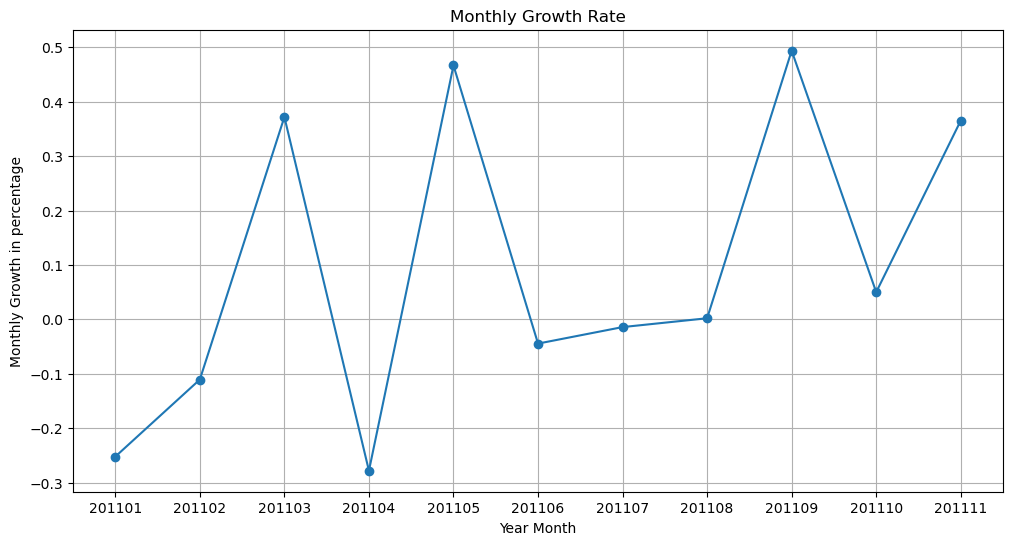

In [10]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy(dtype=str),
         tx_revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth'], marker='o')
plt.title('Monthly Growth Rate')
plt.xlabel('Year Month')
plt.ylabel('Monthly Growth in percentage')
plt.grid()
plt.show()

In [11]:
tx_uk = data.query("Country == 'United Kingdom'").reset_index(drop=True)
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


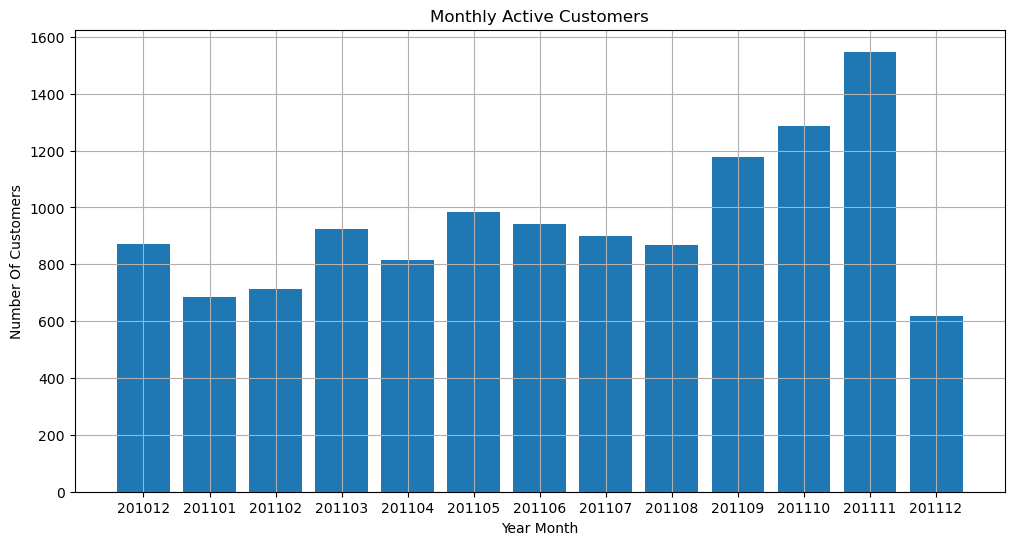

In [14]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_active['CustomerID'])
plt.title('Monthly Active Customers')
plt.xlabel('Year Month')
plt.ylabel('Number Of Customers')
plt.grid()
plt.show()

In [15]:
# Monthly order count

tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


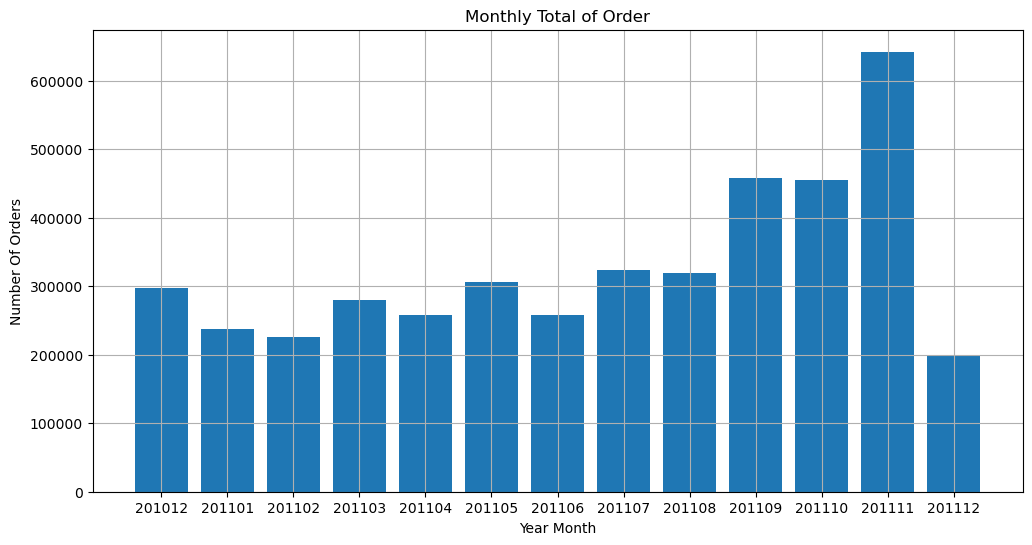

In [16]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_sales['Quantity'])
plt.title('Monthly Total of Order')
plt.xlabel('Year Month')
plt.ylabel('Number Of Orders')
plt.grid()
plt.show()

In [17]:
# Average Revenue per Order

tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


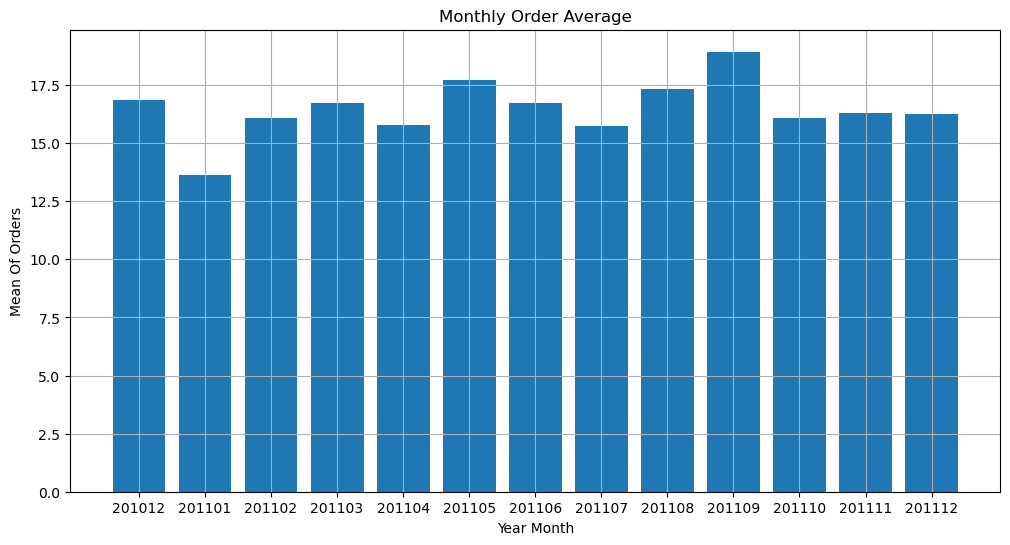

In [18]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_order_avg['Revenue'])
plt.title('Monthly Order Average')
plt.xlabel('Year Month')
plt.ylabel('Mean Of Orders')
plt.grid()
plt.show()

In [19]:
# New Customer Ratio

tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate']\
    .map(lambda date: 100*date.year + date.month)

tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
